In [10]:
import torch 
from dataloader import ECG_Data, prepare_dataset
from resnet_1d import SERes1d
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn import metrics

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [5]:
number_of_channels = 12
number_of_classes = 6

final_data=prepare_dataset(r"ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/ptbxl_database.csv")

ECG_train,ECG_test=train_test_split(final_data,test_size=0.2,random_state=42)

ECG_test=ECG_test.reset_index()

test_dataset=ECG_Data(ECG_test, r"./ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/")
test_loader=torch.utils.data.DataLoader(test_dataset,batch_size=2)

In [6]:
model = SERes1d(number_of_channels,number_of_classes).to(device)
model.load_state_dict(torch.load("best_SEresnet_model.pth"))
model.eval()
accuracy = 0
for data,label in test_loader :
    data = data.to(device)
    out = model(data)
    accuracy += torch.sum(torch.sigmoid(out).argmax(dim=1) == label.to(device))

accuracy = accuracy/ len(test_loader.dataset)
print(accuracy)

c:\Users\ppjotrek\Uni\mgr\1Sem\KBCIDM\Projekt\venv\Lib\site-packages\torch\nn\modules\conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,


tensor(0.7350, device='cuda:0')


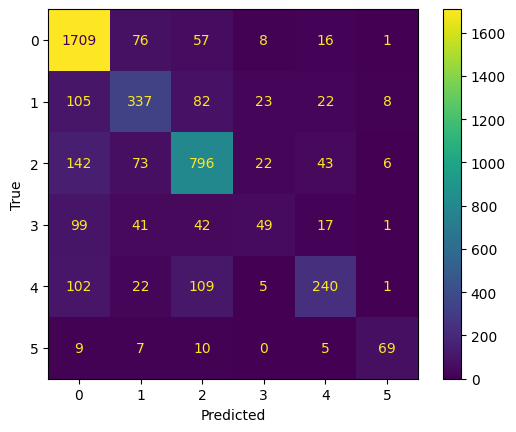

In [13]:

actual = []
predicted = []
for data,label in test_loader :
    data = data.to(device)
    out = model(data)
    actual.extend(label.numpy())
    predicted.extend(torch.sigmoid(out).argmax(dim=1).cpu().numpy())


confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2, 3, 4, 5])


cm_display.plot()
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()